In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import defaultdict
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from operator import itemgetter
import sys

In [2]:
data = pd.read_csv("The-Office-Lines-V2.csv")
data.head(10)

,season,episode,title,scene,speaker,line
0,1,1,Pilot,1,Michael,All right Jim. Your quarterlies look very good...
1,1,1,Pilot,1,Jim,"Oh, I told you. I couldn't close it. So..."
2,1,1,Pilot,1,Michael,So you've come to the master for guidance? Is ...
3,1,1,Pilot,1,Jim,"Actually, you called me in here, but yeah."
4,1,1,Pilot,1,Michael,"All right. Well, let me show you how it's done."
5,1,1,Pilot,2,Michael,"Yes, I'd like to speak to your office manager..."
6,1,1,Pilot,3,Michael,"I've, uh, I've been at Dunder Mifflin for 12 y..."
7,1,1,Pilot,3,Pam,Well. I don't know.
8,1,1,Pilot,3,Michael,"If you think she's cute now, you should have s..."
9,1,1,Pilot,3,Pam,What?


In [3]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [4]:
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
data['clean_msg']= data['line'].apply(lambda x:remove_punctuation(x))
#data.clean_msg[]
data.head()

,season,episode,title,scene,speaker,line,clean_msg
0,1,1,Pilot,1,Michael,All right Jim. Your quarterlies look very good...,All right Jim Your quarterlies look very good ...
1,1,1,Pilot,1,Jim,"Oh, I told you. I couldn't close it. So...",Oh I told you I couldnt close it So
2,1,1,Pilot,1,Michael,So you've come to the master for guidance? Is ...,So youve come to the master for guidance Is th...
3,1,1,Pilot,1,Jim,"Actually, you called me in here, but yeah.",Actually you called me in here but yeah
4,1,1,Pilot,1,Michael,"All right. Well, let me show you how it's done.",All right Well let me show you how its done


In [5]:
data['msg_lower']= data['clean_msg'].apply(lambda x: x.lower())

In [6]:
data.msg_lower = data.msg_lower.str.replace('\d+', '')

<ipython-input-6-c1430116791e>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data.msg_lower = data.msg_lower.str.replace('\d+', '')


In [7]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer= CountVectorizer(stop_words='english')
matrix = vectorizer.fit_transform(data['msg_lower'][:1000])
vt= pd.DataFrame(vectorizer.get_feature_names())
vt

,0
0,aaaahh
1,aaah
2,abandoned
3,able
4,abraham
...,...
1681,youll
1682,young
1683,youre
1684,youve


In [8]:
vector_space=matrix.toarray()
vector_space

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [9]:
df=pd.DataFrame(data=vector_space, columns=vectorizer.get_feature_names())

print("{} rows".format(df.shape[0]))
df=df.T

print(df.shape)

df

1000 rows
(1686, 1000)


,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
aaaahh,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaah,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abandoned,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
able,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abraham,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
youll,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
young,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
youre,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
youve,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
df.reset_index(level=0, inplace=True)
df

,index,0,1,2,3,4,5,6,7,8,...,990,991,992,993,994,995,996,997,998,999
0,aaaahh,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,aaah,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,abandoned,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,able,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,abraham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,youll,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1682,young,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1683,youre,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1684,youve,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
df.reset_index(level=0, inplace=True)
df.rename({'index': 'WORDS'}, axis=1, inplace=True)
df

,WORDS,0,1,2,3,4,5,6,7,8,...,990,991,992,993,994,995,996,997,998,999
0,aaaahh,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,aaah,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,abandoned,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,able,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,abraham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,youll,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1682,young,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1683,youre,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1684,youve,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(df.iloc[:, 1:])

In [13]:
wcss = []
for i in range(1, 40, 2):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)
    print('\rProgress: %d' % i, end='')
    sys.stdout.flush()

Progress: 39

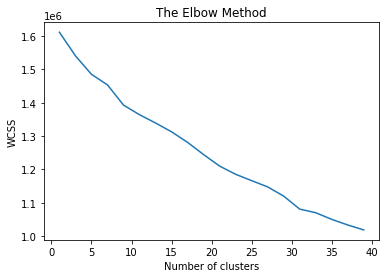

In [14]:
plt.plot(range(1, 40, 2), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

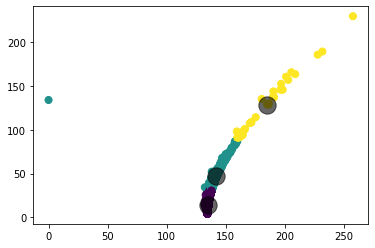

In [15]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_transform(X_train)
fitted=kmeans.fit(y_kmeans)
prediction=kmeans.predict(y_kmeans)
plt.scatter(y_kmeans[:, 0], y_kmeans[:, 1],c=prediction,s=50 , cmap='viridis')
centers2 = fitted.cluster_centers_
plt.scatter(centers2[:, 0], centers2[:, 1],c='black', s=300, alpha=0.6)


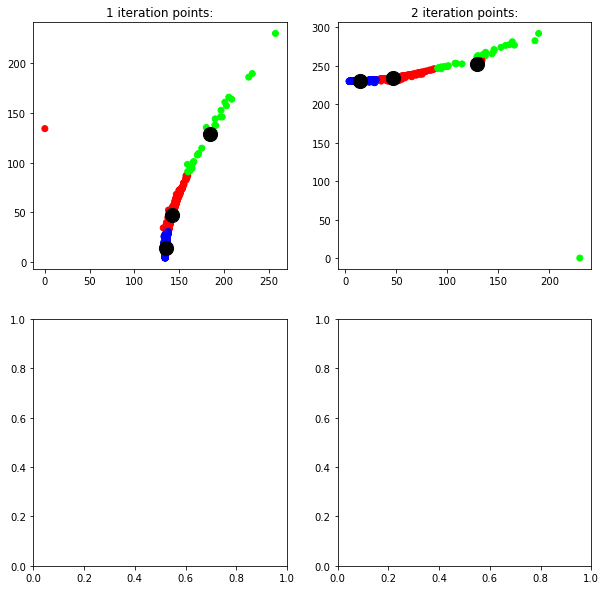

In [16]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
kmeans = KMeans(n_clusters=3,random_state=0,max_iter=i+1)
kmeans.fit(y_kmeans)

fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(10,10))

from sklearn.cluster import KMeans
c=d=0
for i in range(0,2):
    
    ax[c,d].title.set_text(f"{i+1} iteration points:")

    centroids=kmeans.cluster_centers_
    #print(c)
    #print(d)
    #print(y_kmeans[:, i+1])
    
    ax[c,d].scatter(y_kmeans[: ,i],y_kmeans[: ,i+1],c=prediction,cmap='brg')
    
    ax[c,d].scatter(kmeans.cluster_centers_[:, i], kmeans.cluster_centers_[:, i+1], s=200, c='black')
    
    d+=1
    if d==2:
        c+=1
        d=0

In [17]:
df['CLUSTERS'] = kmeans.labels_
df.to_csv("cluster_count_vector.csv",index=False)

In [18]:
df

,WORDS,0,1,2,3,4,5,6,7,8,...,991,992,993,994,995,996,997,998,999,CLUSTERS
0,aaaahh,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,aaah,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,abandoned,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,able,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,abraham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,youll,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1682,young,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1683,youre,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1684,youve,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
dfs = df[['WORDS', 'CLUSTERS']].copy()
dfs.sort_values('CLUSTERS')

,WORDS,CLUSTERS
0,aaaahh,0
942,meet,0
941,mee,0
940,medical,0
939,meant,0
...,...,...
403,dont,2
843,know,2
1033,oh,2
377,didnt,2


In [20]:
dfs.to_csv("cluster_count_vector.csv",index=False)

CLUSTER no.0


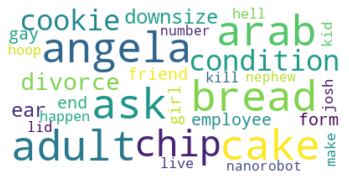

CLUSTER no.1


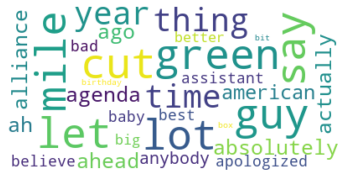

CLUSTER no.2


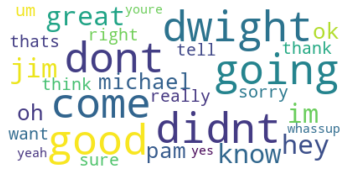

In [21]:
for i in range(0,3):
    word=" ".join(word for word in (dfs[dfs['CLUSTERS']==i].WORDS.values))
    WC = WordCloud(max_font_size=50, max_words=30, background_color="White").generate(word)
    print('CLUSTER no.{}'.format(i))
    plt.imshow(WC, interpolation = 'bilinear') 
    plt.axis('off')
    plt.show()
    i+=1


In [97]:
data.msg_lower = data.msg_lower.str.replace('\d+', '')

<ipython-input-97-c1430116791e>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data.msg_lower = data.msg_lower.str.replace('\d+', '')


In [98]:
vec = TfidfVectorizer(stop_words='english')
matrix = vec.fit_transform(data['msg_lower'][:1000])
idf_df = pd.DataFrame(matrix.toarray(), columns=vec.get_feature_names())
idf_df = idf_df.T
idf_df


,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
aaaahh,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aaah,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
abandoned,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
able,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
abraham,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
youll,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
young,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
youre,0.0,0.0,0.274170,0.0,0.0,0.11869,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
youve,0.0,0.0,0.393764,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [99]:
idf_df.reset_index(level=0, inplace=True)
idf_df

,index,0,1,2,3,4,5,6,7,8,...,990,991,992,993,994,995,996,997,998,999
0,aaaahh,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,aaah,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,abandoned,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,able,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,abraham,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,youll,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1682,young,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1683,youre,0.0,0.0,0.274170,0.0,0.0,0.11869,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1684,youve,0.0,0.0,0.393764,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [100]:
idf_df.rename({'index': 'Words'}, axis=1, inplace=True)
idf_df

,Words,0,1,2,3,4,5,6,7,8,...,990,991,992,993,994,995,996,997,998,999
0,aaaahh,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,aaah,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,abandoned,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,able,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,abraham,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,youll,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1682,young,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1683,youre,0.0,0.0,0.274170,0.0,0.0,0.11869,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1684,youve,0.0,0.0,0.393764,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [101]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(idf_df.iloc[:, 1:])

In [102]:
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)
    print('\rProgress: %d' % i, end='')
    sys.stdout.flush()

Progress: 19

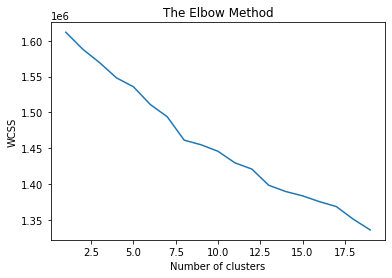

In [103]:
plt.plot(range(1, 20), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

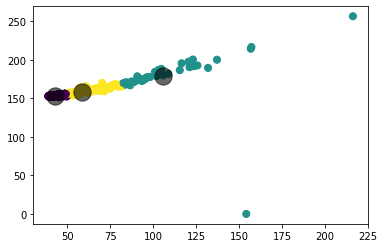

In [104]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_transform(X_train)
fitted=kmeans.fit(y_kmeans)
prediction=kmeans.predict(y_kmeans)
plt.scatter(y_kmeans[:, 0], y_kmeans[:, 1],c=prediction,s=50 , cmap='viridis')
centers2 = fitted.cluster_centers_
plt.scatter(centers2[:, 0], centers2[:, 1],c='black', s=300, alpha=0.6)


0
0
0
1


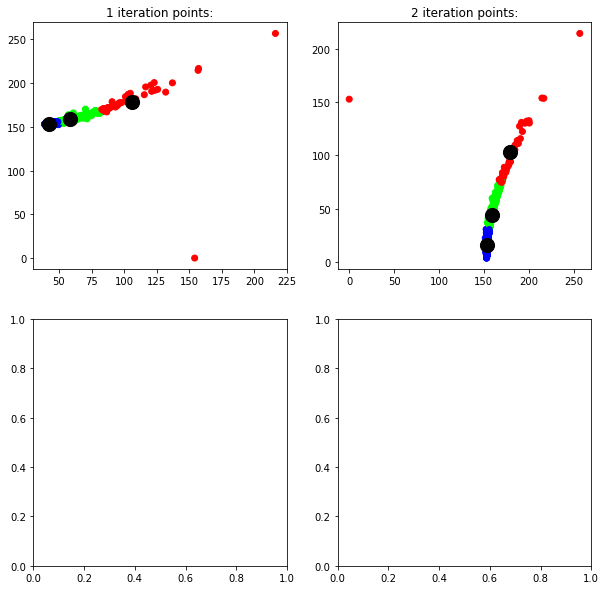

In [105]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
kmeans = KMeans(n_clusters=3,random_state=0,max_iter=i+1)
kmeans.fit(y_kmeans)

fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(10,10))

from sklearn.cluster import KMeans
c=d=0
for i in range(0,2):
    
    ax[c,d].title.set_text(f"{i+1} iteration points:")

    centroids=kmeans.cluster_centers_
    print(c)
    print(d)
    #print(y_kmeans[:, i+1])
    
    ax[c,d].scatter(y_kmeans[: ,i],y_kmeans[: ,i+1],c=prediction,cmap='brg')
    
    ax[c,d].scatter(kmeans.cluster_centers_[:, i], kmeans.cluster_centers_[:, i+1], s=200, c='black')
    
    d+=1
    if d==2:
        c+=1
        d=0

In [106]:
idf_df['CLUSTERS'] = kmeans.labels_
idf_df.to_csv("cluster_bert_embed.csv",index=False)

In [107]:
idf_df

,Words,0,1,2,3,4,5,6,7,8,...,991,992,993,994,995,996,997,998,999,CLUSTERS
0,aaaahh,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,aaah,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,abandoned,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,able,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,abraham,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,youll,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1682,young,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1683,youre,0.0,0.0,0.274170,0.0,0.0,0.11869,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1684,youve,0.0,0.0,0.393764,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [108]:
df = idf_df[['Words', 'CLUSTERS']]
df.sort_values('CLUSTERS')

,Words,CLUSTERS
0,aaaahh,0
911,maam,0
910,luther,0
909,lunchtime,0
1470,teach,0
...,...,...
376,did,2
843,know,2
377,didnt,2
130,birthday,2


In [109]:
df.to_csv("cluster_bert_embed.csv",index=False)

CLUSTER no.0


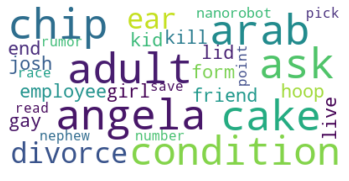

CLUSTER no.1


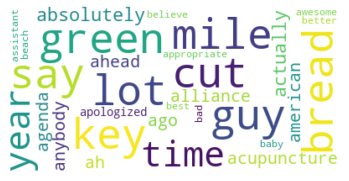

CLUSTER no.2


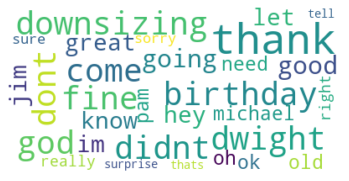

In [110]:
for i in range(0,3):
    word=" ".join(line for line in (df[df['CLUSTERS']==i].Words.values))
    WC = WordCloud(max_font_size=50, max_words=30, background_color="White").generate(word)
    print('CLUSTER no.{}'.format(i))
    plt.imshow(WC, interpolation = 'bilinear') 
    plt.axis('off')
    plt.show()
    i+=1
